100%|██████████| 500/500 [01:50<00:00,  4.52it/s]


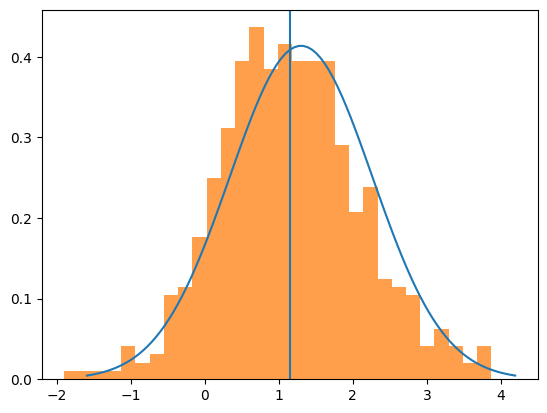

In [7]:
from tqdm import tqdm
import math
import numpy as np
import matplotlib.pyplot as plt

import scipy.stats as stats

from torch.distributions import Normal

from utils import sgld_sample


STEP_SIZE = 0.001
N_STEPS = 3000
N_SAMPLES = 500

mu = 1.3
variance = 0.93
sigma = math.sqrt(variance)

dist = Normal(mu, sigma)

samples = []
for sample in tqdm(range(500)):
    samples.append(sgld_sample(dist.log_prob, step_size=STEP_SIZE, n_steps=N_STEPS))

X = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 100)
plt.plot(X, stats.norm.pdf(X, mu, sigma))

plt.hist(samples, bins=30, alpha=0.75, density=True)
plt.axvline(sum(samples) / len(samples))

plt.show()

## Kolgomorov-Smirnov test to check the fit

We use a simple statistical test to assess if we can "distinguish" the approximatively sampled distribution with its original PDF.

In [8]:
stats.kstest(samples, "norm", (mu, sigma))

KstestResult(statistic=0.0852810590935611, pvalue=0.0013001985298525503, statistic_location=1.6578770875930786, statistic_sign=1)